<a href="https://colab.research.google.com/github/ShayCohenn/data-visualization-1/blob/main/day_73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the .csv file and store it in a Pandas DataFrame called df. Provide these column names: ['DATE', 'TAG', 'POSTS']

Look at the first and last 5 rows of the DataFrame.

In [79]:
import pandas as pd

df = pd.read_csv('./QueryResults.csv', names=['DATE', 'TAG', 'POSTS']).dropna()

print(df.head())
print(df.tail())

                  DATE         TAG  POSTS
1  2008-07-01 00:00:00          c#    3.0
2  2008-08-01 00:00:00    assembly    8.0
3  2008-08-01 00:00:00  javascript  162.0
4  2008-08-01 00:00:00           c   85.0
5  2008-08-01 00:00:00      python  124.0
                     DATE    TAG   POSTS
1987  2020-07-01 00:00:00      r  5694.0
1988  2020-07-01 00:00:00     go   743.0
1989  2020-07-01 00:00:00   ruby   775.0
1990  2020-07-01 00:00:00   perl   182.0
1991  2020-07-01 00:00:00  swift  3607.0


How many rows and how many columns does it have?

In [80]:
df.shape

(1991, 3)

Count the number of entries in each column.

In [81]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Given that the TAG serves as our category column, can you figure out how to count the number of posts per language?

In [82]:
df_groupedby_tag = df.groupby('TAG')
df_groupedby_tag.sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212.0
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499.0
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403.0
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510.0
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286.0


 Count how many months of posts exist for each programming language

In [83]:
df_groupedby_tag.count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


Convert the date from '2008-07-01 00:00:00' to '2008-07-01'

In [84]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0
...,...,...,...
1987,2020-07-01,r,5694.0
1988,2020-07-01,go,743.0
1989,2020-07-01,ruby,775.0
1990,2020-07-01,perl,182.0


Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df

In [85]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [86]:
reshaped_df.shape

(145, 14)

Examine the head and the tail of the DataFrame. What does it look like

In [87]:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  delphi   go    java  javascript  \
DATE                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   85.0   511.0  164.0    14.0  0.0   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0  0.0  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0  0.0  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0  0.0   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  161.0   124.0  0.0   73.0    0.0  
2008-09-01  131.0  482.0   542.0  6.0  290.0    0.0  
2008-10-01  127.0  617.0   510.0  0.0  249.0    0.0  
2008-11-01   97.0  504.0   452.0  1.0  160.0    0.0  
TAG         assembly       c       c#     c++  delphi     go     jav

Print out the column names

In [88]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per column

In [89]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

Show a line chart for the popularity of a programming language using matplotlib

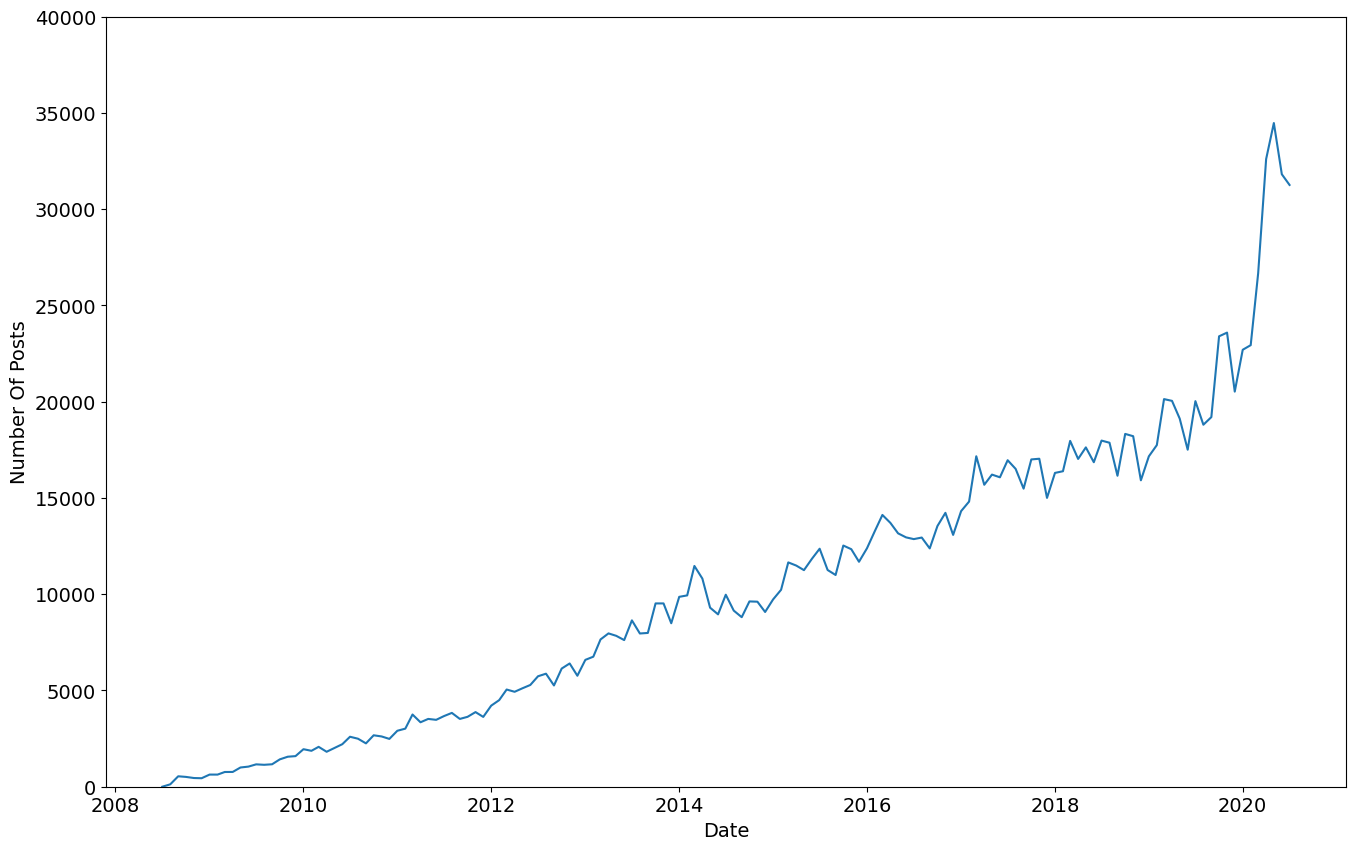

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number Of Posts', fontsize=14)
plt.ylim(0,40000)
plt.plot(reshaped_df.index, reshaped_df['python'])

 Plot both Java and Python next to each other

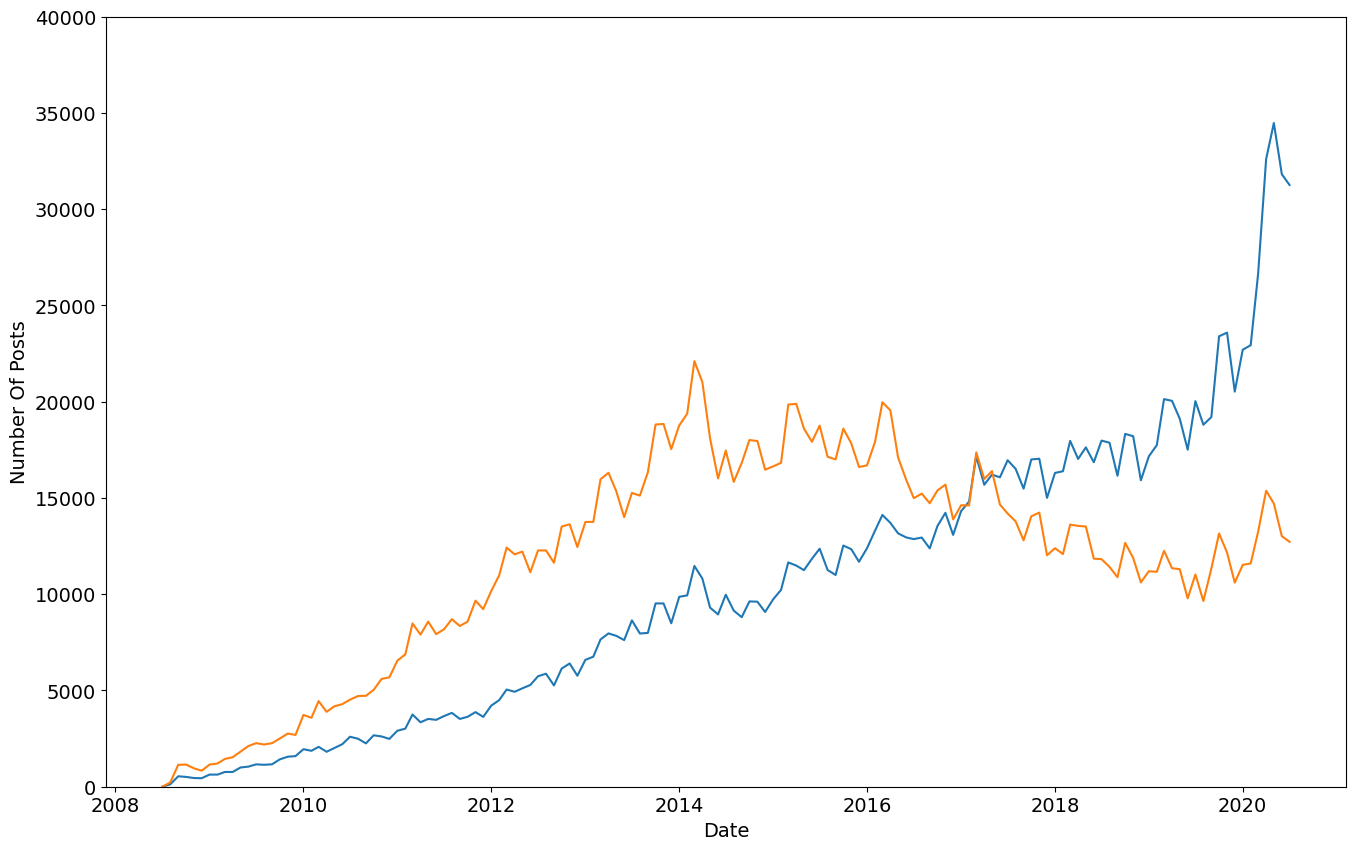

In [91]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number Of Posts', fontsize=14)
plt.ylim(0,40000)
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.plot(reshaped_df.index, reshaped_df['java'])

Plot all the programming languages on the same chart

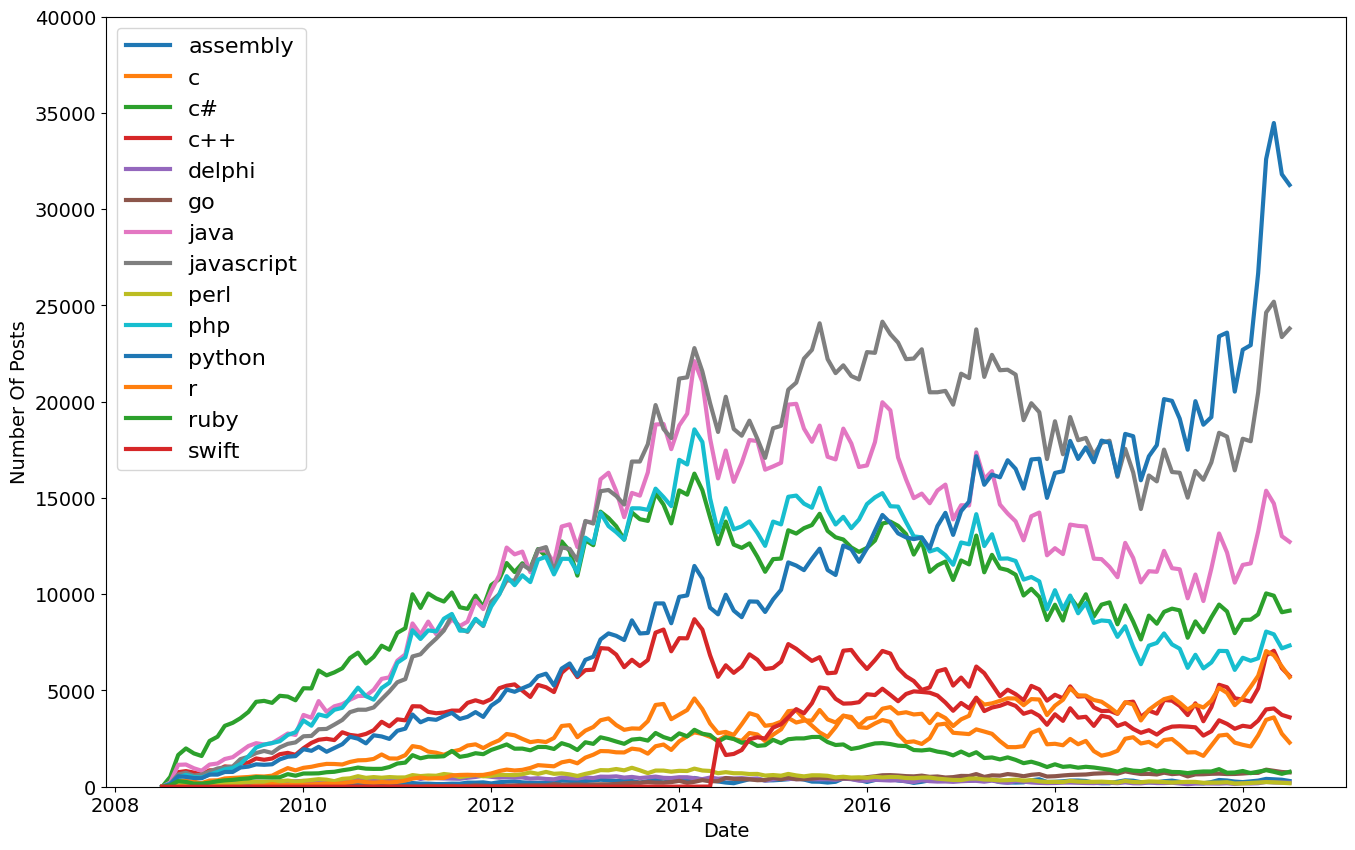

In [92]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number Of Posts', fontsize=14)
plt.ylim(0,40000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

Smooth out the observations by taking an average

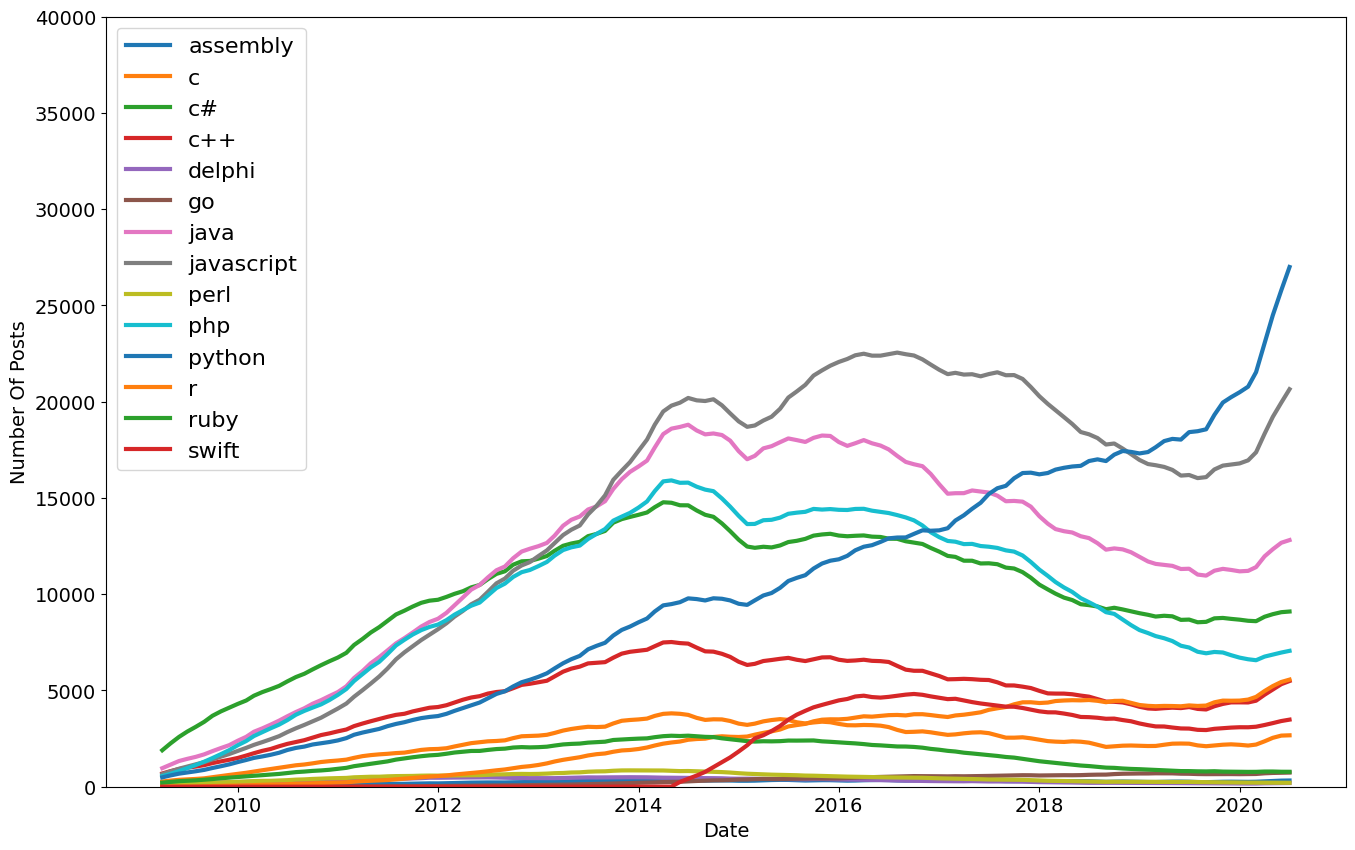

In [93]:
avg_df = reshaped_df.rolling(window=10).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number Of Posts', fontsize=14)
plt.ylim(0,40000)
for column in avg_df.columns:
  plt.plot(avg_df.index, avg_df[column], linewidth=3, label=avg_df[column].name)

plt.legend(fontsize=16)